# Heat map representation

This notebook shows an example of a 2-d representation of time series energy data.

I construct a data frame from all circuits.
I then export the values of that data frame to a numpy array.
Matplotlib has a function (imshow) which assigns a color to the value of each element in the array.

This representation allows us to use our vision to quickly spot patterns in the data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
circuits =    ['EVI0000111', 'EVI0000112', 'EVI0000113', 'EVI0000114',
              'EVI0000121', 'EVI0000122', 'EVI0000123', 'EVI0000124',
              'EVI0000131', 'EVI0000132', 'EVI0000133', 'EVI0000134',
              'EVI0000141', 'EVI0000142', 'EVI0000143', 'EVI0000144',
              'EVI0000151', 'EVI0000152', 'EVI0000153', 'EVI0000154',
              'EVI0000161', 'EVI0000162', 'EVI0000163', 'EVI0000164',
              'EVI0000171', 'EVI0000172', 'EVI0000173', 'EVI0000174',
              'EVI0000181', 'EVI0000182', 'EVI0000183', 'EVI0000184',
              'EVI0000191', 'EVI0000192', 'EVI0000193', 'EVI0000194',
              'EVI0000201', 'EVI0000202', 'EVI0000203', 'EVI0000204',
              'EVI0000221', 'EVI0000222', 'EVI0000223', 'EVI0000224',
              'EVI0000231', 'EVI0000232', 'EVI0000233', 'EVI0000234'
              ]

In [3]:
input_data_directory = '../master/data/processed_deduplicated/'
df_dict = {}
for circuit in circuits:
    input_filename = '{}{}.csv'.format(input_data_directory, circuit)
    input_data = pd.read_csv(input_filename, index_col=1, parse_dates=True)
    # use pandas to remove remaining duplicate dates
    input_data = input_data[~input_data.index.duplicated(keep='first')]
    df_dict[circuit] = input_data['VALUE']
    

In [4]:
image_df = pd.DataFrame(df_dict)
image = image_df.values

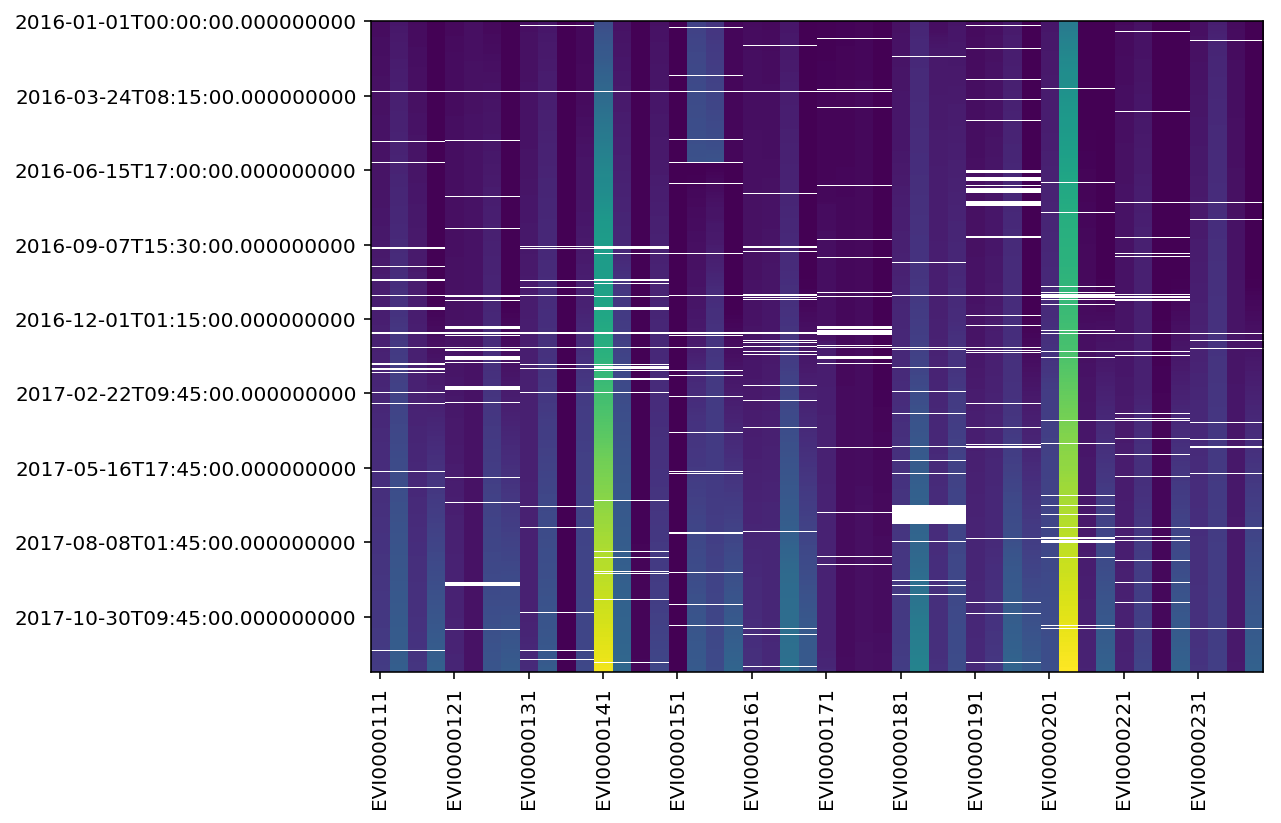

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
# set label for every 4th column and circuit name
plt.xticks(range(image.shape[1])[::4], circuits[::4], rotation=90)
# quick and dirty way to set sparse date labels.  better to get a nice bimonthly index.
date_skip = 8000
plt.yticks(range(image.shape[0])[::date_skip], image_df.index.values[::date_skip])
# aspect ratio necessary because there are ~70k y samples and only ~50 columns
ax.imshow(image, aspect = .0005)
plt.show()